In [1]:
import pandas as pd
# pd.set_option('display.max_rows', None)
from pandas import datetime

In [2]:
import numpy as np


#to plot within notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

import seaborn as sns


#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [3]:
Airtel = pd.read_csv('airtel_stock1.csv')
India3m = pd.read_csv('India3m_stock1.csv')
Sbin = pd.read_csv('sbin_stock1.csv')

In [4]:
Airtel.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,BHARTIARTL,EQ,352.70,354.40,364.90,351.65,363.00,362.90,358.90,2217263,7.957697e+13,25445,1042436,0.4701
1,2015-01-02,BHARTIARTL,EQ,362.90,363.80,367.00,362.00,365.15,365.05,364.73,2519814,9.190425e+13,46461,1493017,0.5925
2,2015-01-05,BHARTIARTL,EQ,365.05,366.25,366.25,355.60,357.20,356.95,359.31,1446759,5.198369e+13,27848,688766,0.4761
3,2015-01-06,BHARTIARTL,EQ,356.95,356.10,356.10,348.40,354.50,354.15,353.79,3530178,1.248926e+14,59463,2725330,0.7720
4,2015-01-07,BHARTIARTL,EQ,354.15,351.95,358.00,350.50,355.00,355.00,355.41,4415546,1.569343e+14,117150,3461811,0.7840


In [5]:
Airtel.shape

(495, 15)

In [7]:
# data extraction(We Need Daily Purpose)

stocks=[Airtel,India3m,Sbin]

def features_build(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.weekofyear
    
    
    
for i in range(len(stocks)):
    # print(stocks[i])
    features_build(stocks[i])

### PART 1

In [8]:
Airtel_copy = Airtel.copy()

In [9]:
Sbin_copy = Sbin.copy()

In [10]:
India3m_copy = India3m.copy()

In [11]:
Airtel_copy = Airtel_copy.drop(['Symbol','Series','Prev Close','Last','VWAP','Deliverable Volume'],1)

In [12]:
Sbin_copy = Sbin_copy.drop(['Trades','%Deliverble','Symbol','Series','Prev Close','Last','VWAP','Deliverable Volume'],1)

In [13]:
India3m_copy = India3m_copy.drop(['Trades','%Deliverble','Symbol','Series','Prev Close','Last','VWAP','Deliverable Volume'],1)

In [14]:
weeks = [4, 16, 28, 40, 52]

In [15]:
def indexing(stock):
    stock.index = stock['Date']
    return stock

Airtel_copy.name = 'Airtel_copy'
Sbin_copy.name = 'Sbin_copy'
India3m.name = 'India3m'

In [16]:
indexing(Airtel_copy)
indexing(Sbin_copy)
indexing(India3m_copy)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2015-01-01,2015-01-01,6444.80,6529.15,6402.90,6504.60,170,1.101650e+11,2015,1,1,1
2015-01-02,2015-01-02,6474.90,6612.00,6451.10,6493.45,555,3.623821e+11,2015,1,2,1
2015-01-05,2015-01-05,6451.00,6548.70,6451.00,6484.40,201,1.306897e+11,2015,1,5,2
2015-01-06,2015-01-06,6500.05,6549.00,6205.00,6333.00,684,4.349916e+11,2015,1,6,2
2015-01-07,2015-01-07,6497.00,6649.65,6261.05,6294.90,231,1.462048e+11,2015,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,2016-12-26,10460.00,10460.00,10150.15,10162.10,400,4.096098e+11,2016,12,26,52
2016-12-27,2016-12-27,10200.00,10497.85,10008.80,10433.10,3467,3.508533e+12,2016,12,27,52
2016-12-28,2016-12-28,10500.00,10787.35,10399.55,10636.35,1017,1.088057e+12,2016,12,28,52


In [17]:
def plot_time_series(stock, weeks = [4, 16, 28, 40, 52]):
    
    dummy = pd.DataFrame()
    # First Resampling into Weeks format to calculate for weeks
    dummy['Close'] = stock['Close'].resample('W').mean() 
     
    for i in range(len(weeks)):
        m_a = dummy['Close'].rolling(weeks[i]).mean() # M.A using inbuilt function
        dummy[" Mov.AVG for " + str(weeks[i])+ " Weeks"] = m_a
        print('Calculated Moving Averages: for {0} weeks: \n\n {1}' .format(weeks[i], dummy['Close']))
    dummy.plot(title="Moving Averages for {} \n\n" .format(stock.name))

In [18]:
Airtel_copy

,Date,Open,High,Low,Close,Volume,Turnover,Trades,%Deliverble,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,,,
2015-01-01,2015-01-01,354.40,364.90,351.65,362.90,2217263,7.957697e+13,25445,0.4701,2015,1,1,1
2015-01-02,2015-01-02,363.80,367.00,362.00,365.05,2519814,9.190425e+13,46461,0.5925,2015,1,2,1
2015-01-05,2015-01-05,366.25,366.25,355.60,356.95,1446759,5.198369e+13,27848,0.4761,2015,1,5,2
2015-01-06,2015-01-06,356.10,356.10,348.40,354.15,3530178,1.248926e+14,59463,0.7720,2015,1,6,2
2015-01-07,2015-01-07,351.95,358.00,350.50,355.00,4415546,1.569343e+14,117150,0.7840,2015,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,2016-12-26,294.50,297.00,288.70,296.10,2451002,7.198434e+13,27762,0.6397,2016,12,26,52
2016-12-27,2016-12-27,296.00,300.80,291.15,299.60,2296599,6.793662e+13,40991,0.6046,2016,12,27,52
2016-12-28,2016-12-28,299.00,303.10,296.80,299.50,2613061,7.828168e+13,52544,0.5490,2016,12,28,52


Calculated Moving Averages: for 4 weeks: 

 Date
2015-01-04    363.975
2015-01-11    356.610
2015-01-18    346.650
2015-01-25    365.690
2015-02-01    379.325
               ...   
2016-12-04    321.010
2016-12-11    329.640
2016-12-18    322.090
2016-12-25    299.510
2017-01-01    300.770
Freq: W-SUN, Name: Close, Length: 105, dtype: float64
Calculated Moving Averages: for 16 weeks: 

 Date
2015-01-04    363.975
2015-01-11    356.610
2015-01-18    346.650
2015-01-25    365.690
2015-02-01    379.325
               ...   
2016-12-04    321.010
2016-12-11    329.640
2016-12-18    322.090
2016-12-25    299.510
2017-01-01    300.770
Freq: W-SUN, Name: Close, Length: 105, dtype: float64
Calculated Moving Averages: for 28 weeks: 

 Date
2015-01-04    363.975
2015-01-11    356.610
2015-01-18    346.650
2015-01-25    365.690
2015-02-01    379.325
               ...   
2016-12-04    321.010
2016-12-11    329.640
2016-12-18    322.090
2016-12-25    299.510
2017-01-01    300.770
Freq: W-SUN, Name

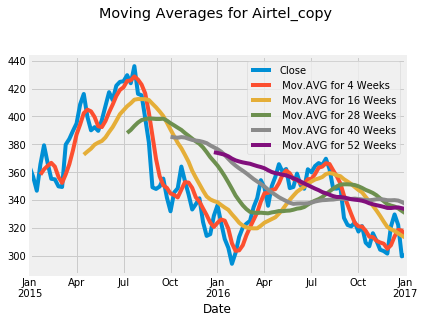

In [19]:
plot_time_series(Airtel_copy)

In [20]:
Airtel_copy= Airtel_copy.asfreq('D', method ='pad')        # pad-ffill : forward-fill
Sbin_copy= Sbin_copy.asfreq('D', method ='pad')
India3m_copy= India3m_copy.asfreq('D', method ='pad')

Airtel_copy.name = 'Airtel_copy'
Sbin_copy.name = 'Sbin_copy'
India3m.name = 'India3m_copy'

In [21]:
def plot_roll_win(stock, win = [10, 50]):
    
    dummy = pd.DataFrame()
    
    dummy['Close'] = stock['Close']
     
    for i in range(len(win)):
        m_a = dummy['Close'].rolling(win[i]).mean() # M.A using predefined function
        dummy[" Mov.AVG for " + str(win[i])+ " Roll Window"] = m_a
        print('Calculated Moving Averages: for {0} weeks: \n\n {1}' .format(win[i], dummy['Close']))
    dummy.plot(title="Moving Averages for {} \n\n" .format(stock.name))

Calculated Moving Averages: for 10 weeks: 

 Date
2015-01-01    362.90
2015-01-02    365.05
2015-01-03    365.05
2015-01-04    365.05
2015-01-05    356.95
               ...  
2016-12-26    296.10
2016-12-27    299.60
2016-12-28    299.50
2016-12-29    303.00
2016-12-30    305.65
Freq: D, Name: Close, Length: 730, dtype: float64
Calculated Moving Averages: for 50 weeks: 

 Date
2015-01-01    362.90
2015-01-02    365.05
2015-01-03    365.05
2015-01-04    365.05
2015-01-05    356.95
               ...  
2016-12-26    296.10
2016-12-27    299.60
2016-12-28    299.50
2016-12-29    303.00
2016-12-30    305.65
Freq: D, Name: Close, Length: 730, dtype: float64


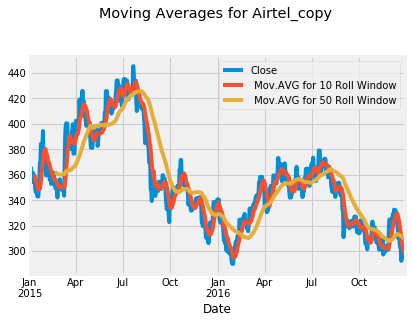

In [22]:
plot_roll_win(Airtel_copy)

### Volume_Shock

In [23]:
def volume_shocks(stock):
    """
    'Volume' - Vol_t
    'Volume next day - vol_t+1
    
    """
    stock["vol_t+1"] = stock.Volume.shift(1)  #next rows value
    
    stock["volume_shock"] = ((abs(stock["vol_t+1"] - stock["Volume"])/stock["Volume"]*100)  > 10).astype(int)
    
    return stock

In [24]:
volume_shocks(Airtel_copy)
volume_shocks(Sbin_copy)
volume_shocks(India3m_copy)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock
Date,,,,,,,,,,,,,
2015-01-01,2015-01-01,6444.8,6529.15,6402.90,6504.60,170,1.101650e+11,2015,1,1,1,NaN,0
2015-01-02,2015-01-02,6474.9,6612.00,6451.10,6493.45,555,3.623821e+11,2015,1,2,1,170.0,1
2015-01-03,2015-01-02,6474.9,6612.00,6451.10,6493.45,555,3.623821e+11,2015,1,2,1,555.0,0
2015-01-04,2015-01-02,6474.9,6612.00,6451.10,6493.45,555,3.623821e+11,2015,1,2,1,555.0,0
2015-01-05,2015-01-05,6451.0,6548.70,6451.00,6484.40,201,1.306897e+11,2015,1,5,2,555.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,2016-12-26,10460.0,10460.00,10150.15,10162.10,400,4.096098e+11,2016,12,26,52,1565.0,1
2016-12-27,2016-12-27,10200.0,10497.85,10008.80,10433.10,3467,3.508533e+12,2016,12,27,52,400.0,1
2016-12-28,2016-12-28,10500.0,10787.35,10399.55,10636.35,1017,1.088057e+12,2016,12,28,52,3467.0,1


In [25]:
def direction_fun(stock):
    
    # considerng only shock - 1 valued rows.
    # 0 - negative and 1- positive
    if stock["volume_shock"] == 0:
        pass
    else:
        if (stock["vol_t+1"] - stock["Volume"]) < 0:
            return 0
        else:
            return 1

In [26]:
def vol_shock_direction(stock):
    stock['VOL_SHOCK_DIR'] = 'Nan'
    stock['VOL_SHOCK_DIR'] = stock.apply(direction_fun, axis=1)
    return stock

In [27]:
vol_shock_direction(India3m_copy)
vol_shock_direction(Sbin_copy)
vol_shock_direction(Airtel_copy)

,Date,Open,High,Low,Close,Volume,Turnover,Trades,%Deliverble,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR
Date,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,354.40,364.90,351.65,362.90,2217263,7.957697e+13,25445,0.4701,2015,1,1,1,NaN,0,NaN
2015-01-02,2015-01-02,363.80,367.00,362.00,365.05,2519814,9.190425e+13,46461,0.5925,2015,1,2,1,2217263.0,1,0.0
2015-01-03,2015-01-02,363.80,367.00,362.00,365.05,2519814,9.190425e+13,46461,0.5925,2015,1,2,1,2519814.0,0,NaN
2015-01-04,2015-01-02,363.80,367.00,362.00,365.05,2519814,9.190425e+13,46461,0.5925,2015,1,2,1,2519814.0,0,NaN
2015-01-05,2015-01-05,366.25,366.25,355.60,356.95,1446759,5.198369e+13,27848,0.4761,2015,1,5,2,2519814.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,2016-12-26,294.50,297.00,288.70,296.10,2451002,7.198434e+13,27762,0.6397,2016,12,26,52,1845279.0,1,0.0
2016-12-27,2016-12-27,296.00,300.80,291.15,299.60,2296599,6.793662e+13,40991,0.6046,2016,12,27,52,2451002.0,0,NaN
2016-12-28,2016-12-28,299.00,303.10,296.80,299.50,2613061,7.828168e+13,52544,0.5490,2016,12,28,52,2296599.0,1,0.0


In [28]:
def price_shocks(stock):
    """
    'ClosePrice' - Close_t
    'Close Price next day - vol_t+1
    
    """
    stock["price_t+1"] = stock.Close.shift(1)  #next rows value
    
    stock["price_shock"] = (abs((stock["price_t+1"] - stock["Close"])/stock["Close"]*100)  > 2).astype(int)
    
    stock["price_black_swan"] = stock['price_shock'] # Since both had same data anad info/
    
    return stock

In [29]:
price_shocks(Airtel_copy)
price_shocks(Sbin_copy)
price_shocks(India3m_copy)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan
Date,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,6444.8,6529.15,6402.90,6504.60,170,1.101650e+11,2015,1,1,1,NaN,0,NaN,NaN,0,0
2015-01-02,2015-01-02,6474.9,6612.00,6451.10,6493.45,555,3.623821e+11,2015,1,2,1,170.0,1,0.0,6504.60,0,0
2015-01-03,2015-01-02,6474.9,6612.00,6451.10,6493.45,555,3.623821e+11,2015,1,2,1,555.0,0,NaN,6493.45,0,0
2015-01-04,2015-01-02,6474.9,6612.00,6451.10,6493.45,555,3.623821e+11,2015,1,2,1,555.0,0,NaN,6493.45,0,0
2015-01-05,2015-01-05,6451.0,6548.70,6451.00,6484.40,201,1.306897e+11,2015,1,5,2,555.0,1,1.0,6493.45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,2016-12-26,10460.0,10460.00,10150.15,10162.10,400,4.096098e+11,2016,12,26,52,1565.0,1,1.0,10301.45,0,0
2016-12-27,2016-12-27,10200.0,10497.85,10008.80,10433.10,3467,3.508533e+12,2016,12,27,52,400.0,1,0.0,10162.10,1,1
2016-12-28,2016-12-28,10500.0,10787.35,10399.55,10636.35,1017,1.088057e+12,2016,12,28,52,3467.0,1,1.0,10433.10,0,0


In [30]:
def direction_fun_price(stock):
    
    # considerng only shock - 1 valued rows.
    # 0 - negative and 1- positive
    if stock["price_shock"] == 0:
        pass
    else:
        if (stock["price_t+1"] - stock["Close"]) < 0:
            return 0
        else:
            return 1

In [31]:
def price_shock_direction(stock):
    stock['PRICE_SHOCK_DIR'] = 'Nan'
    stock['PRICE_SHOCK_DIR'] = stock.apply(direction_fun_price, axis=1)
    return stock

In [32]:
vol_shock_direction(Airtel_copy)
vol_shock_direction(Sbin_copy)
vol_shock_direction(India3m_copy)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan
Date,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,6444.8,6529.15,6402.90,6504.60,170,1.101650e+11,2015,1,1,1,NaN,0,NaN,NaN,0,0
2015-01-02,2015-01-02,6474.9,6612.00,6451.10,6493.45,555,3.623821e+11,2015,1,2,1,170.0,1,0.0,6504.60,0,0
2015-01-03,2015-01-02,6474.9,6612.00,6451.10,6493.45,555,3.623821e+11,2015,1,2,1,555.0,0,NaN,6493.45,0,0
2015-01-04,2015-01-02,6474.9,6612.00,6451.10,6493.45,555,3.623821e+11,2015,1,2,1,555.0,0,NaN,6493.45,0,0
2015-01-05,2015-01-05,6451.0,6548.70,6451.00,6484.40,201,1.306897e+11,2015,1,5,2,555.0,1,1.0,6493.45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,2016-12-26,10460.0,10460.00,10150.15,10162.10,400,4.096098e+11,2016,12,26,52,1565.0,1,1.0,10301.45,0,0
2016-12-27,2016-12-27,10200.0,10497.85,10008.80,10433.10,3467,3.508533e+12,2016,12,27,52,400.0,1,0.0,10162.10,1,1
2016-12-28,2016-12-28,10500.0,10787.35,10399.55,10636.35,1017,1.088057e+12,2016,12,28,52,3467.0,1,1.0,10433.10,0,0


In [33]:
def price_shock_wo_vol_shock(stock):
    
    stock["not_vol_shock"]  = (~(stock["volume_shock"].astype(bool))).astype(int)
    stock["price_shock_w/0_vol_shock"] = stock["not_vol_shock"] & stock["price_shock"]
    
    return stock

In [34]:
price_shock_wo_vol_shock(Airtel_copy)
price_shock_wo_vol_shock(Sbin_copy)
price_shock_wo_vol_shock(India3m_copy)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan,not_vol_shock,price_shock_w/0_vol_shock
Date,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,6444.8,6529.15,6402.90,6504.60,170,1.101650e+11,2015,1,1,1,NaN,0,NaN,NaN,0,0,1,0
2015-01-02,2015-01-02,6474.9,6612.00,6451.10,6493.45,555,3.623821e+11,2015,1,2,1,170.0,1,0.0,6504.60,0,0,0,0
2015-01-03,2015-01-02,6474.9,6612.00,6451.10,6493.45,555,3.623821e+11,2015,1,2,1,555.0,0,NaN,6493.45,0,0,1,0
2015-01-04,2015-01-02,6474.9,6612.00,6451.10,6493.45,555,3.623821e+11,2015,1,2,1,555.0,0,NaN,6493.45,0,0,1,0
2015-01-05,2015-01-05,6451.0,6548.70,6451.00,6484.40,201,1.306897e+11,2015,1,5,2,555.0,1,1.0,6493.45,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,2016-12-26,10460.0,10460.00,10150.15,10162.10,400,4.096098e+11,2016,12,26,52,1565.0,1,1.0,10301.45,0,0,0,0
2016-12-27,2016-12-27,10200.0,10497.85,10008.80,10433.10,3467,3.508533e+12,2016,12,27,52,400.0,1,0.0,10162.10,1,1,0,0
2016-12-28,2016-12-28,10500.0,10787.35,10399.55,10636.35,1017,1.088057e+12,2016,12,28,52,3467.0,1,1.0,10433.10,0,0,0,0


### Vissualization

In [35]:
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
from bokeh.palettes import Blues9
from bokeh.palettes import RdBu3
from bokeh.models import ColumnDataSource, CategoricalColorMapper, ContinuousColorMapper
from bokeh.palettes import Spectral11

In [36]:
output_notebook()

Loading BokehJS ...

In [39]:
def bokeh_plot(stock):
    data = dict(stock=stock['Close'], Date=stock.index)
    
    p = figure(plot_width=800, plot_height=250,  title = 'time series for {}' .format(stock), x_axis_type="datetime")
    p.line(stock.index, stock['Close'], color='blue', alpha=0.5)
    
    #show price shock w/o vol shock
    
    p.circle(stock.index, stock.Close*stock["price_shock_w/0_vol_shock"], size=4, legend='price shock without vol shock')
    show(p)

In [41]:
bokeh_plot(Airtel_copy)
bokeh_plot(Sbin_copy)
bokeh_plot(India3m_copy)